In [5]:

import xarray as xr
import h5py
import matplotlib.pyplot as plt


import numpy as np
import cartopy.crs as ccrs
import cartopy

In [6]:
# nh lats 
# lats = collect(30.0:1:90.0) ; 
# lats = np.arange(30.0, 90.0 + 1, 1)
# southern hemis
lats = np.arange(-90.0, -45.0 + 1,1)

# lons = collect(-179.5:3:179.5) ;
lons = np.arange(-179.5, 179.5, 3)

In [13]:
# lats

In [7]:
path1 = "/net/fluo/data2/groupMembers/cchristo/rf_maps/winter_nh_rf"
path2 = "/net/fluo/data2/groupMembers/cchristo/rf_maps/summer_nh_rf"

In [20]:
f = h5py.File(path1, "r")
f.close()
f_summer = h5py.File(path2, "r")
f_summer.close()
# f["result"].value

In [8]:
# dir(f)
# f.keys()
# f['result'].value
# f['result'].value

ds = xr.open_dataset(path1)
ds = ds.assign_coords(coords = {'lat':lats, 'lon':lons})
ds = ds.rename({'phony_dim_0':'lon', 'phony_dim_1': 'lat'})


ds_summer = xr.open_dataset(path2)
ds_summer = ds_summer.assign_coords(coords = {'lat':lats, 'lon':lons})
ds_summer = ds_summer.rename({'phony_dim_0':'lon', 'phony_dim_1': 'lat'})

OSError: [Errno -101] NetCDF: HDF error: b'/net/fluo/data2/groupMembers/cchristo/rf_maps/winter_nh_rf'

In [200]:
ampl = (ds_summer - ds).apply(abs)

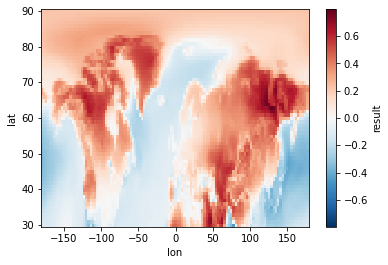

In [201]:
(ds_summer - ds)['result'].T.plot()


In [113]:
# ds['result'].sel(lat = slice(45,90)).transpose().plot.pcolormesh(
#     transform=ccrs.PlateCarree(),
#     subplot_kws={'projection': ccrs.Orthographic(-80, 35)}
# )
#     subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
#     transform=ccrs.PlateCarree())

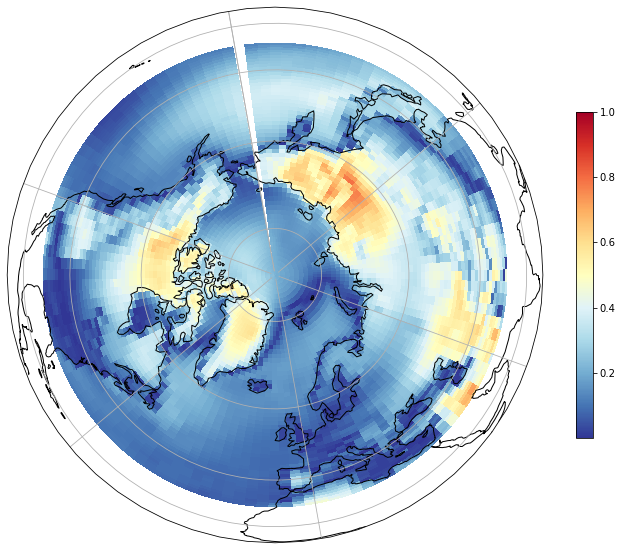

In [206]:
fig = plt.figure(figsize=(12, 12))
crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
# ax = plt.axes(projection=ccrs.Orthographic(-10, 90))
ax = plt.axes(projection=ccrs.Orthographic(-10, -90))

    
dat = ax.pcolormesh( ds.lon.values, ds.lat.values,
              ampl['result'].values.T, 
              transform=ccrs.PlateCarree(), 
              cmap = plt.get_cmap('RdYlBu_r'), vmax = 1)


# ax.add_feature(cartopy.feature.OCEAN, zorder=0)
# ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.coastlines()

fig.colorbar(dat, shrink=0.5)
ax.set_global()
ax.gridlines()
plt.show()

# plt.savefig("/home/cchristo/proj_christian/rad_transfer_julia/figs/rf_nh_ampl.png", dpi = 100)